Import libraries

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !pip install tensorflow-gpu

In [115]:
!nvidia-smi

Fri Dec  3 12:54:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:22:00.0 Off |                  N/A |
|100%   26C    P8    26W / 250W |      1MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [141]:
# keras module for building LSTM 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow
from keras import models 
# from tensorflow.keras.layers import Input, Embedding, LSTM, 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import string, os 
import math
from matplotlib import pyplot as plt

import ast
from tensorflow.keras.preprocessing.sequence import pad_sequences
import itertools

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


# Load data
- tokenizaci jsem udelala vedle, proze jsem to mela uz udelany vedle

### BPE
- list tokens id

In [117]:
df = pd.read_csv('../data/VEGF2_ChEMBL28-10980_pic50_BPE_list_tokens_ids.csv',sep=',')
df.head(5)

,canonical_smiles,value,sln,deep_smiles,selfies,inchi,canonical_smiles_BPE_encoding,sln_BPE_encoding,deep_smiles_BPE_encoding,selfies_BPE_encoding,inchi_BPE_encoding,canonical_smiles_BPE_encoding_ids,sln_BPE_encoding_ids,deep_smiles_BPE_encoding_ids,selfies_BPE_encoding_ids,inchi_BPE_encoding_ids
0,^Br.COc1cc(OC)cc(N(CCP(=O)(O)O)c2ccc3ncc(-c4cn...,7.32,^BrH$,^Br.COcccOC))ccNCCP=O)O)O))))ccccncc-ccnnC)c5)...,^[Br].[C][O][C][=C][C][Branch1_1][Ring1][O][C]...,^InChI=1S/C22H24N5O5P.BrH/c1-26-14-15(12-24-26...,"Encoding(num_tokens=31, attributes=[ids, type_...","Encoding(num_tokens=3, attributes=[ids, type_i...","Encoding(num_tokens=25, attributes=[ids, type_...","Encoding(num_tokens=119, attributes=[ids, type...","Encoding(num_tokens=109, attributes=[ids, type...","[61, 313, 13, 290, 7, 274, 8, 256, 7, 45, 7, 2...","[61, 824, 3]","[61, 312, 13, 400, 256, 3928, 28, 46, 8, 46, 8...","[276, 258, 289, 34, 256, 46, 256, 34, 257, 34,...","[61, 282, 28, 278, 14, 3948, 13, 3064, 14, 288..."
1,^Brc1ccc(-c2nc3ccc(Nc4ccnc5ccccc45)cc3[nH]2)cc1$,6.75,^BrC[5]=CHCH=C(C[4]=NC[3]=CHCH=C(NHC[1]=CHCH=N...,^Brcccc-cnccccNcccncccccc%106)))))))))))cc6[nH...,^[Br][C][=C][C][=C][Branch2_1][Ring1][S][C][=N...,^InChI=1S/C22H15BrN4/c23-15-7-5-14(6-8-15)22-2...,"Encoding(num_tokens=15, attributes=[ids, type_...","Encoding(num_tokens=55, attributes=[ids, type_...","Encoding(num_tokens=15, attributes=[ids, type_...","Encoding(num_tokens=89, attributes=[ids, type_...","Encoding(num_tokens=87, attributes=[ids, type_...","[61, 2441, 266, 731, 7, 1096, 8, 281, 58, 278,...","[61, 607, 58, 20, 257, 259, 28, 34, 7, 34, 58,...","[61, 2427, 12, 977, 4, 308, 289, 264, 58, 279,...","[276, 258, 256, 34, 257, 34, 256, 34, 257, 34,...","[61, 282, 28, 278, 14, 6300, 14, 402, 12, 259,..."
2,^Brc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1$,6.42,^BrC[5]=CHCH=C(C[4]=NC[3]=CHCH=C(NHC[1]=NCH=NC...,^Brcccc-cnccccNcncncccccc%106)))))))))))cc6[nH...,^[Br][C][=C][C][=C][Branch2_1][Ring1][S][C][=N...,^InChI=1S/C21H14BrN5/c22-14-7-5-13(6-8-14)20-2...,"Encoding(num_tokens=15, attributes=[ids, type_...","Encoding(num_tokens=55, attributes=[ids, type_...","Encoding(num_tokens=15, attributes=[ids, type_...","Encoding(num_tokens=89, attributes=[ids, type_...","Encoding(num_tokens=89, attributes=[ids, type_...","[61, 2441, 266, 731, 7, 1053, 8, 281, 58, 278,...","[61, 607, 58, 20, 257, 259, 28, 34, 7, 34, 58,...","[61, 2427, 12, 912, 4, 308, 289, 264, 58, 279,...","[276, 258, 256, 34, 257, 34, 256, 34, 257, 34,...","[61, 282, 28, 278, 14, 4227, 14, 396, 12, 260,..."
3,^Brc1cccc(Nc2ncc(-c3ccccc3)s2)n1$,7.85,^BrC[3]=CHCH=CHC(NHC[2]=NCH=C(C[1]=CHCH=CHCH=C...,^BrcccccNcncc-cccccc6))))))s5))))))n6$,^[Br][C][=C][C][=C][C][Branch2_1][Ring1][Ring1...,^InChI=1S/C14H10BrN3S/c15-12-7-4-8-13(17-12)18...,"Encoding(num_tokens=11, attributes=[ids, type_...","Encoding(num_tokens=37, attributes=[ids, type_...","Encoding(num_tokens=9, attributes=[ids, type_i...","Encoding(num_tokens=63, attributes=[ids, type_...","Encoding(num_tokens=63, attributes=[ids, type_...","[61, 3248, 7, 434, 266, 357, 8, 401, 8, 284, 3]","[61, 607, 58, 18, 257, 259, 28, 264, 7, 263, 5...","[61, 3503, 12, 277, 265, 343, 265, 301, 3]","[276, 258, 256, 34, 257, 34, 256, 34, 257, 34,...","[61, 282, 28, 278, 14, 6295, 14, 752, 12, 264,..."
4,^Brc1cnc(Nc2ccccn2)s1$,7.15,^BrC[2]=CHN=C(NHC[1]=CHCH=CHCH=N@1)S@2$,^BrccncNcccccn6)))))))s5$,^[Br][C][=C][N][=C][Branch1_1][Branch2_3][N][C...,^InChI=1S/C8H6BrN3S/c9-6-5-11-8(13-6)12-7-3-1-...,"Encoding(num_tokens=7, attributes=[ids, type_i...","Encoding(num_tokens=25, attributes=[ids, type_...","Encoding(num_tokens=5, attributes=[ids, type_i...","Encoding(num_tokens=39, attributes=[ids, type_...","Encoding(num_tokens=49, attributes=[ids, type_...","[61, 3249, 7, 1532, 8, 397, 3]","[61, 607, 58, 17, 257, 269, 28, 34, 7, 263, 58...","[61, 3502, 269, 343, 3]","[276, 258, 256, 34, 257, 34, 256, 45, 257, 34,...","[61, 282, 28, 278, 14, 6568, 14, 1158, 12, 21,..."


### Padding
- je treba udelat padding pro vsechny listy s tokens_id (oplnit vektory nulami do stejne delky)

In [118]:
n_features = 1
RANDOM_STATE=42
ys = df['value']

col_names = ['canonical_smiles_BPE_encoding_ids','sln_BPE_encoding_ids','deep_smiles_BPE_encoding_ids','selfies_BPE_encoding_ids','inchi_BPE_encoding_ids']

list_tokens = []
max_length=[]

i=0

for col_name in col_names:
    print(col_name)
    res = df[col_name].apply(lambda tokens_ids: ast.literal_eval(tokens_ids))
    max_length.append(df[col_name].apply(lambda x: len(x)).max())
    print(max_length[i])
    vector_with_padding = pad_sequences(res, maxlen=max_length[i], padding='post', truncating='post')
    list_tokens.append(vector_with_padding)
    print('\n')
    i+=1

list_tokens[0]

canonical_smiles_BPE_encoding_ids
472


sln_BPE_encoding_ids
755


deep_smiles_BPE_encoding_ids
401


selfies_BPE_encoding_ids
1996


inchi_BPE_encoding_ids
1989




array([[  61,  313,   13, ...,    0,    0,    0],
       [  61, 2441,  266, ...,    0,    0,    0],
       [  61, 2441,  266, ...,    0,    0,    0],
       ...,
       [  61,  587,    7, ...,    0,    0,    0],
       [  61,  587,    7, ...,    0,    0,    0],
       [  61,  868,  266, ...,    0,    0,    0]], dtype=int32)

In [5]:
# list_tokens

### Statistika
- jak vypadaji hodnoty biologicke aktivity (jaky rozsah - priblizit hodnotu RMSE)

Text(0, 0.5, 'pIC50')

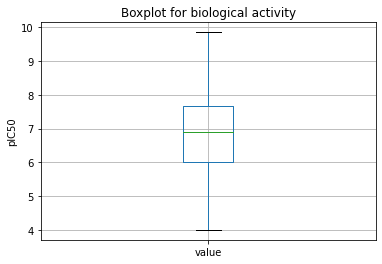

In [7]:
boxplot = df.boxplot(column=['value'])
boxplot.set_title('Boxplot for biological activity')
boxplot.set_ylabel('pIC50')

### SMILES

In [8]:
# # smiles ulozeni tokenu pro smiles
# idx = 0
# xs = list_tokens[idx]
# ys = df['value']

# X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=RANDOM_STATE)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_STATE) # 0.25 x 0.8 = 0.2
# # testovaci a validacni data maji stejnou velikost

# t_w= len(np.unique(list(itertools.chain.from_iterable(X_train))))
# print(X_train)
# print(np.unique(list(itertools.chain.from_iterable(X_train))))
# print(t_w)
# print(y_train)

# Trenovani neuronove site

In [9]:
def showPlot(history,linearNotation_name,modelLossPlot_name):
    # plot training history
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss - '+linearNotation_name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.savefig(modelLossPlot_name)
    plt.show()

In [225]:
def tempTrainNeuralNetwork(idx, t_w, max_length,linearNotation_name,bestModel_name, modelHistory_name, modelLossPlot_name,n_patience,n_steps,n_features,X_train,y_train,X_val, y_val):
    #Model build
    print(X_train[:1,:20])
    
    opt = tensorflow.keras.optimizers.Adam(lr=0.005)
    model = Sequential()
    model.add(Embedding(t_w+5000, 100, input_length=max_length))
    model.add(LSTM(100, input_shape=(max_length, n_features) ))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=opt,metrics=['mse'])
    model.summary()
    # batch_size = 64
    
#     model = Sequential()
#     model.add(Embedding(t_w+5000, 100, input_length=max_length))
#     # model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
#     # model.add(SpatialDropout1D(0.2))
# #     return_sequences=True
#     # model.add(LSTM(50,activation='linear'))
#     # model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
#     model.add(LSTM(50, activation='relu'))
#     # model.add(LSTM(50,activation='relu'))
#     # model.add(Dense(1))
#     model.add(Dense(1, activation='relu'))
#     model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#     model.summary()


   
    
    
    # model = Sequential()
    # model.add(Embedding(5000, 100, input_length=max_length))
    # model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    # model.add(Dense(1, activation='linear'))
    # model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])        
    # model.summary()
    
    # embedding_dim=100
    
    # model = Sequential()
    # model.add(Embedding(5000, embedding_dim, input_length = max_length))
    # model.add(SpatialDropout1D(0.25))
    # model.add(LSTM(80, dropout=0.5))
    # model.add(Dropout(0.2))
    # model.add(Dense(1, activation='linear'))
    # model.compile(loss='mse',optimizer='rmsprop')
    # model.summary()

    # model.fit(X_train_pad, y_train, validation_split=0.2, batch_size= 64, epochs= 20)
    
    # dava inf
    # model = Sequential()
    # model.add(LSTM(50, activation='relu', input_shape=(n_steps,n_features)))
    # model.add(Dense(1))
    # model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    # model.summary()
    
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=n_patience)
    mc = ModelCheckpoint(bestModel_name, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=4000, verbose=0, callbacks=[es, mc])
    # history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

    # ulozeni historie modelu
    with open(modelHistory_name, 'w') as f:
        np.save(modelHistory_name,history.history)

    showPlot(history,linearNotation_name,modelLossPlot_name)
    return model,history

In [120]:
# kontrola, rozdeleni data tak je vzdy stejne i kdyz pouziji data pro jiny chem. lin. zapis
def tempSplitData(idx, list_token, ys, RANDOM_STATE):  
    # smiles ulozeni tokenu pro smiles
    X_train, X_test, y_train, y_test = train_test_split(list_token, ys, test_size=0.2, random_state=RANDOM_STATE)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_STATE) # 0.25 x 0.8 = 0.2
    t_w= len(np.unique(list(itertools.chain.from_iterable(X_train))))
    
    return X_train,y_train,X_val,y_val,X_test,y_test,t_w

#### Train model

In [ ]:
# zkontrolovat, jestli se jedna os pravny chemicky linearni zapis
linearNotation_names = ['smiles','sln','deep_smiles','selfies','inchi']
n_patience=10

for idx in range(len(linearNotation_names)):
    if(idx>=1):
        break
    X_train,y_train,X_val,y_val,X_test,y_test,t_w = tempSplitData(idx, list_tokens[idx], ys, RANDOM_STATE)
    
    linearNotation_name = linearNotation_names[idx]
    t_w= len(np.unique(list(itertools.chain.from_iterable(X_train))))
    print(t_w)
    m_l = X_train.shape[1]
    print(m_l)

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    # y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
    # y_val = X_train.reshape((y_val.shape[0], X_val.shape[1], 1))
    print(X_train.shape)
    n_steps = X_train.shape[1]
    n_features = 1
    # print(X_train[:1,:20])


    bestModel_name = '../data/models/check/best_model_'+linearNotation_names[idx]+'.h5'
    modelHistory_name = '../data/models/check/history_'+linearNotation_names[idx]+'.npy'
    modelLossPlot_name = '../data/models/check/modelLoss_'+linearNotation_names[idx]+'.png'

    model, history = tempTrainNeuralNetwork(idx, t_w, m_l,linearNotation_names[idx],bestModel_name, modelHistory_name, modelLossPlot_name,n_patience,n_steps,n_features,X_train,y_train,X_val, y_val)

    # load the saved model
    # saved_model = models.load_model(bestModel_name)
#     load save history
    # history=np.load(modelHistory_name,allow_pickle='TRUE').item()

    result_smiles = model.evaluate(X_test, y_test)
    print("RMSE: ",result_smiles)

2703
472
(4295, 472, 1)
[[[  61]
  [ 318]
  [   7]
  [  46]
  [   8]
  [2232]
  [   7]
  [  34]
  [   7]
  [  37]
  [ 280]
  [  37]
  [   8]
  [  37]
  [   8]
  [ 506]
  [   3]
  [   0]
  [   0]
  [   0]]]
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_44 (Embedding)    (None, 472, 100)          770300    
                                                                 
 lstm_54 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_51 (Dense)            (None, 1)                 101       
                                                                 
Total params: 850,801
Trainable params: 850,801
Non-trainable params: 0
_______________________________________

In [216]:
# load the saved model
saved_model = models.load_model(bestModel_name)
# load save history
# history=np.load(modelHistory_name,allow_pickle='TRUE').item()
result_smiles = saved_model.evaluate(X_test, y_test)
print("RMSE: ",result_smiles)

45/45 [==============================] - 23s 123ms/step - loss: 1.2484 - mse: 1.2484
RMSE:  [1.2483618259429932, 1.2483618259429932]


In [217]:
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = saved_model.predict(X_test,verbose =1)

45/45 [==============================] - 6s 128ms/step


In [218]:
print(len(X_test))
print(predictions)
len(predictions)

1432
[[6.8140225]
 [6.8140225]
 [6.8140225]
 ...
 [6.8140225]
 [6.8140225]
 [6.8140225]]


1432

In [219]:
np.unique(predictions)

array([6.8140225], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

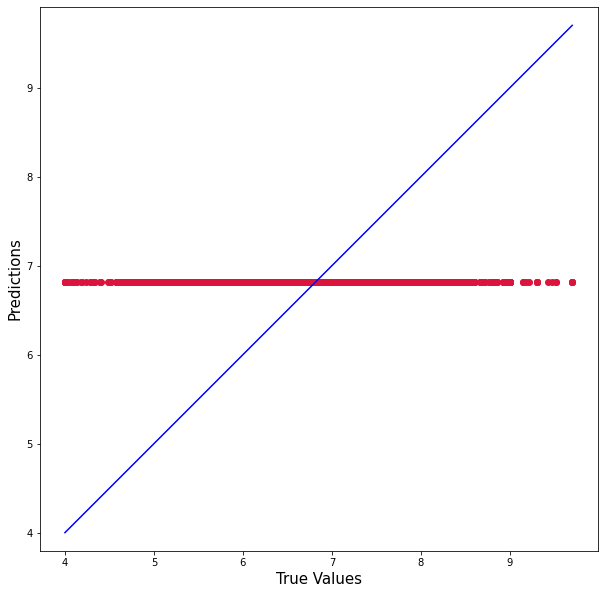

In [220]:
# plt.plot(y_test, predictions, 'o', color='black');
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max( predictions), max(y_test))
p2 = min(min( predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show

In [86]:
y_test

1894    5.22
6372    5.62
239     6.00
4609    8.17
5694    7.04
        ... 
4953    7.57
279     7.48
5360    6.71
1703    7.75
2439    7.80
Name: value, Length: 1432, dtype: float64